In [ ]:
#import libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/diabetes_dataset.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome


In [66]:
# Build NN model
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential([
   Dense(21, activation='relu', input_dim=8),
   Dense(1, activation='sigmoid'),
 ]);

classifier.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 21)                189       
                                                                 
 dense_28 (Dense)            (None, 1)                 22        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile model
from tensorflow.keras.optimizers import Adam
classifier.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [69]:
history=classifier.fit(x, y, validation_split=0.2, batch_size = 32, epochs = 1000, verbose=2)

Epoch 1/1000
20/20 - 1s - loss: 23.3586 - accuracy: 0.6531 - val_loss: 17.9414 - val_accuracy: 0.6429 - 672ms/epoch - 34ms/step
Epoch 2/1000
20/20 - 0s - loss: 13.5275 - accuracy: 0.6531 - val_loss: 9.1942 - val_accuracy: 0.6429 - 69ms/epoch - 3ms/step
Epoch 3/1000
20/20 - 0s - loss: 6.2725 - accuracy: 0.6433 - val_loss: 5.4179 - val_accuracy: 0.5519 - 56ms/epoch - 3ms/step
Epoch 4/1000
20/20 - 0s - loss: 4.3243 - accuracy: 0.6254 - val_loss: 3.9332 - val_accuracy: 0.5779 - 53ms/epoch - 3ms/step
Epoch 5/1000
20/20 - 0s - loss: 3.0534 - accuracy: 0.6450 - val_loss: 2.6229 - val_accuracy: 0.6104 - 68ms/epoch - 3ms/step
Epoch 6/1000
20/20 - 0s - loss: 2.2971 - accuracy: 0.6189 - val_loss: 1.8793 - val_accuracy: 0.5714 - 67ms/epoch - 3ms/step
Epoch 7/1000
20/20 - 0s - loss: 1.8902 - accuracy: 0.5912 - val_loss: 1.5000 - val_accuracy: 0.5714 - 65ms/epoch - 3ms/step
Epoch 8/1000
20/20 - 0s - loss: 1.6390 - accuracy: 0.5961 - val_loss: 1.3170 - val_accuracy: 0.5974 - 63ms/epoch - 3ms/step
Epo

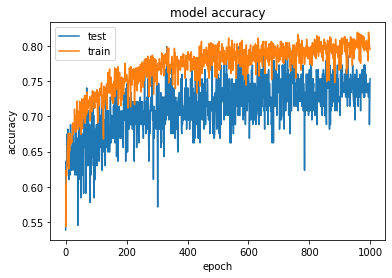

In [67]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

In [ ]:
# Get confusion matrix for randoly slected test sets

# 
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split data into train/test sets with randomization
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)


y_pred = classifier.predict(x_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]
y_test = np.array(y_test)
total = 0
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y_pred)):
  total=total+1
  if (y_test[i] == 1 and y_pred[i] == 1): tn=tn+1
  elif (y_test[i] == 0 and y_pred[i] == 0): tp=tp+1
  elif (y_test[i] == 0 and y_pred[i] == 1): fn=fn+1
  elif (y_test[i] == 1 and y_pred[i] == 0): fp=fp+1
  else: print("E")

print("Total " + str(total))
print("TP: ",tp/total)
print("TN: ",tn/total)
print("FP: ",fp/total)
print("FN: ",fn/total)


Total 154
TP:  0.538961038961039
TN:  0.2922077922077922
FP:  0.07792207792207792
FN:  0.09090909090909091
